In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from atypic.effects import (
    RollPixelsEffect,
    RandomRollPixelsEffect,
    ColorValueEffect,
    ColorChannelSplitEffect,
    CorruptionEffect,
    SortEffect,
    ColorPaletteReductionEffect,
)
from atypic.mask import Masker

effects = [
    RollPixelsEffect,
    RandomRollPixelsEffect,
    ColorValueEffect,
    ColorChannelSplitEffect,
    CorruptionEffect,
    SortEffect,
    ColorPaletteReductionEffect,
]


masks = [
    lambda mask_obj: mask_obj.create_full_mask(),
    lambda mask_obj: mask_obj.create_circle_mask(center=(0.5, 0.5), radius=0.2),
    lambda mask_obj: mask_obj.create_ellipse_mask(
        center=(0.2, 0.2), axes=(0.1, 0.3), angle=45
    ),
    lambda mask_obj: mask_obj.create_polygon_mask(
        points=[(0.1, 0.1), (0.3, 0.2), (0.9, 0.7), (0.3, 0.4)]
    ),
    lambda mask_obj: mask_obj.create_rectangle_mask(
        top_left=(0.1, 0.1), bottom_right=(0.9, 0.9)
    ),
    lambda mask_obj: mask_obj.create_band_mask(
        orientation="horizontal", start=0.1, end=0.9
    ),
    lambda mask_obj: mask_obj.create_stripe_mask(
        orientation="vertical", stripe_width=0.1, gap=0.1
    ),
    lambda mask_obj: mask_obj.create_checkerboard_mask(block_size=0.25),
]


(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)


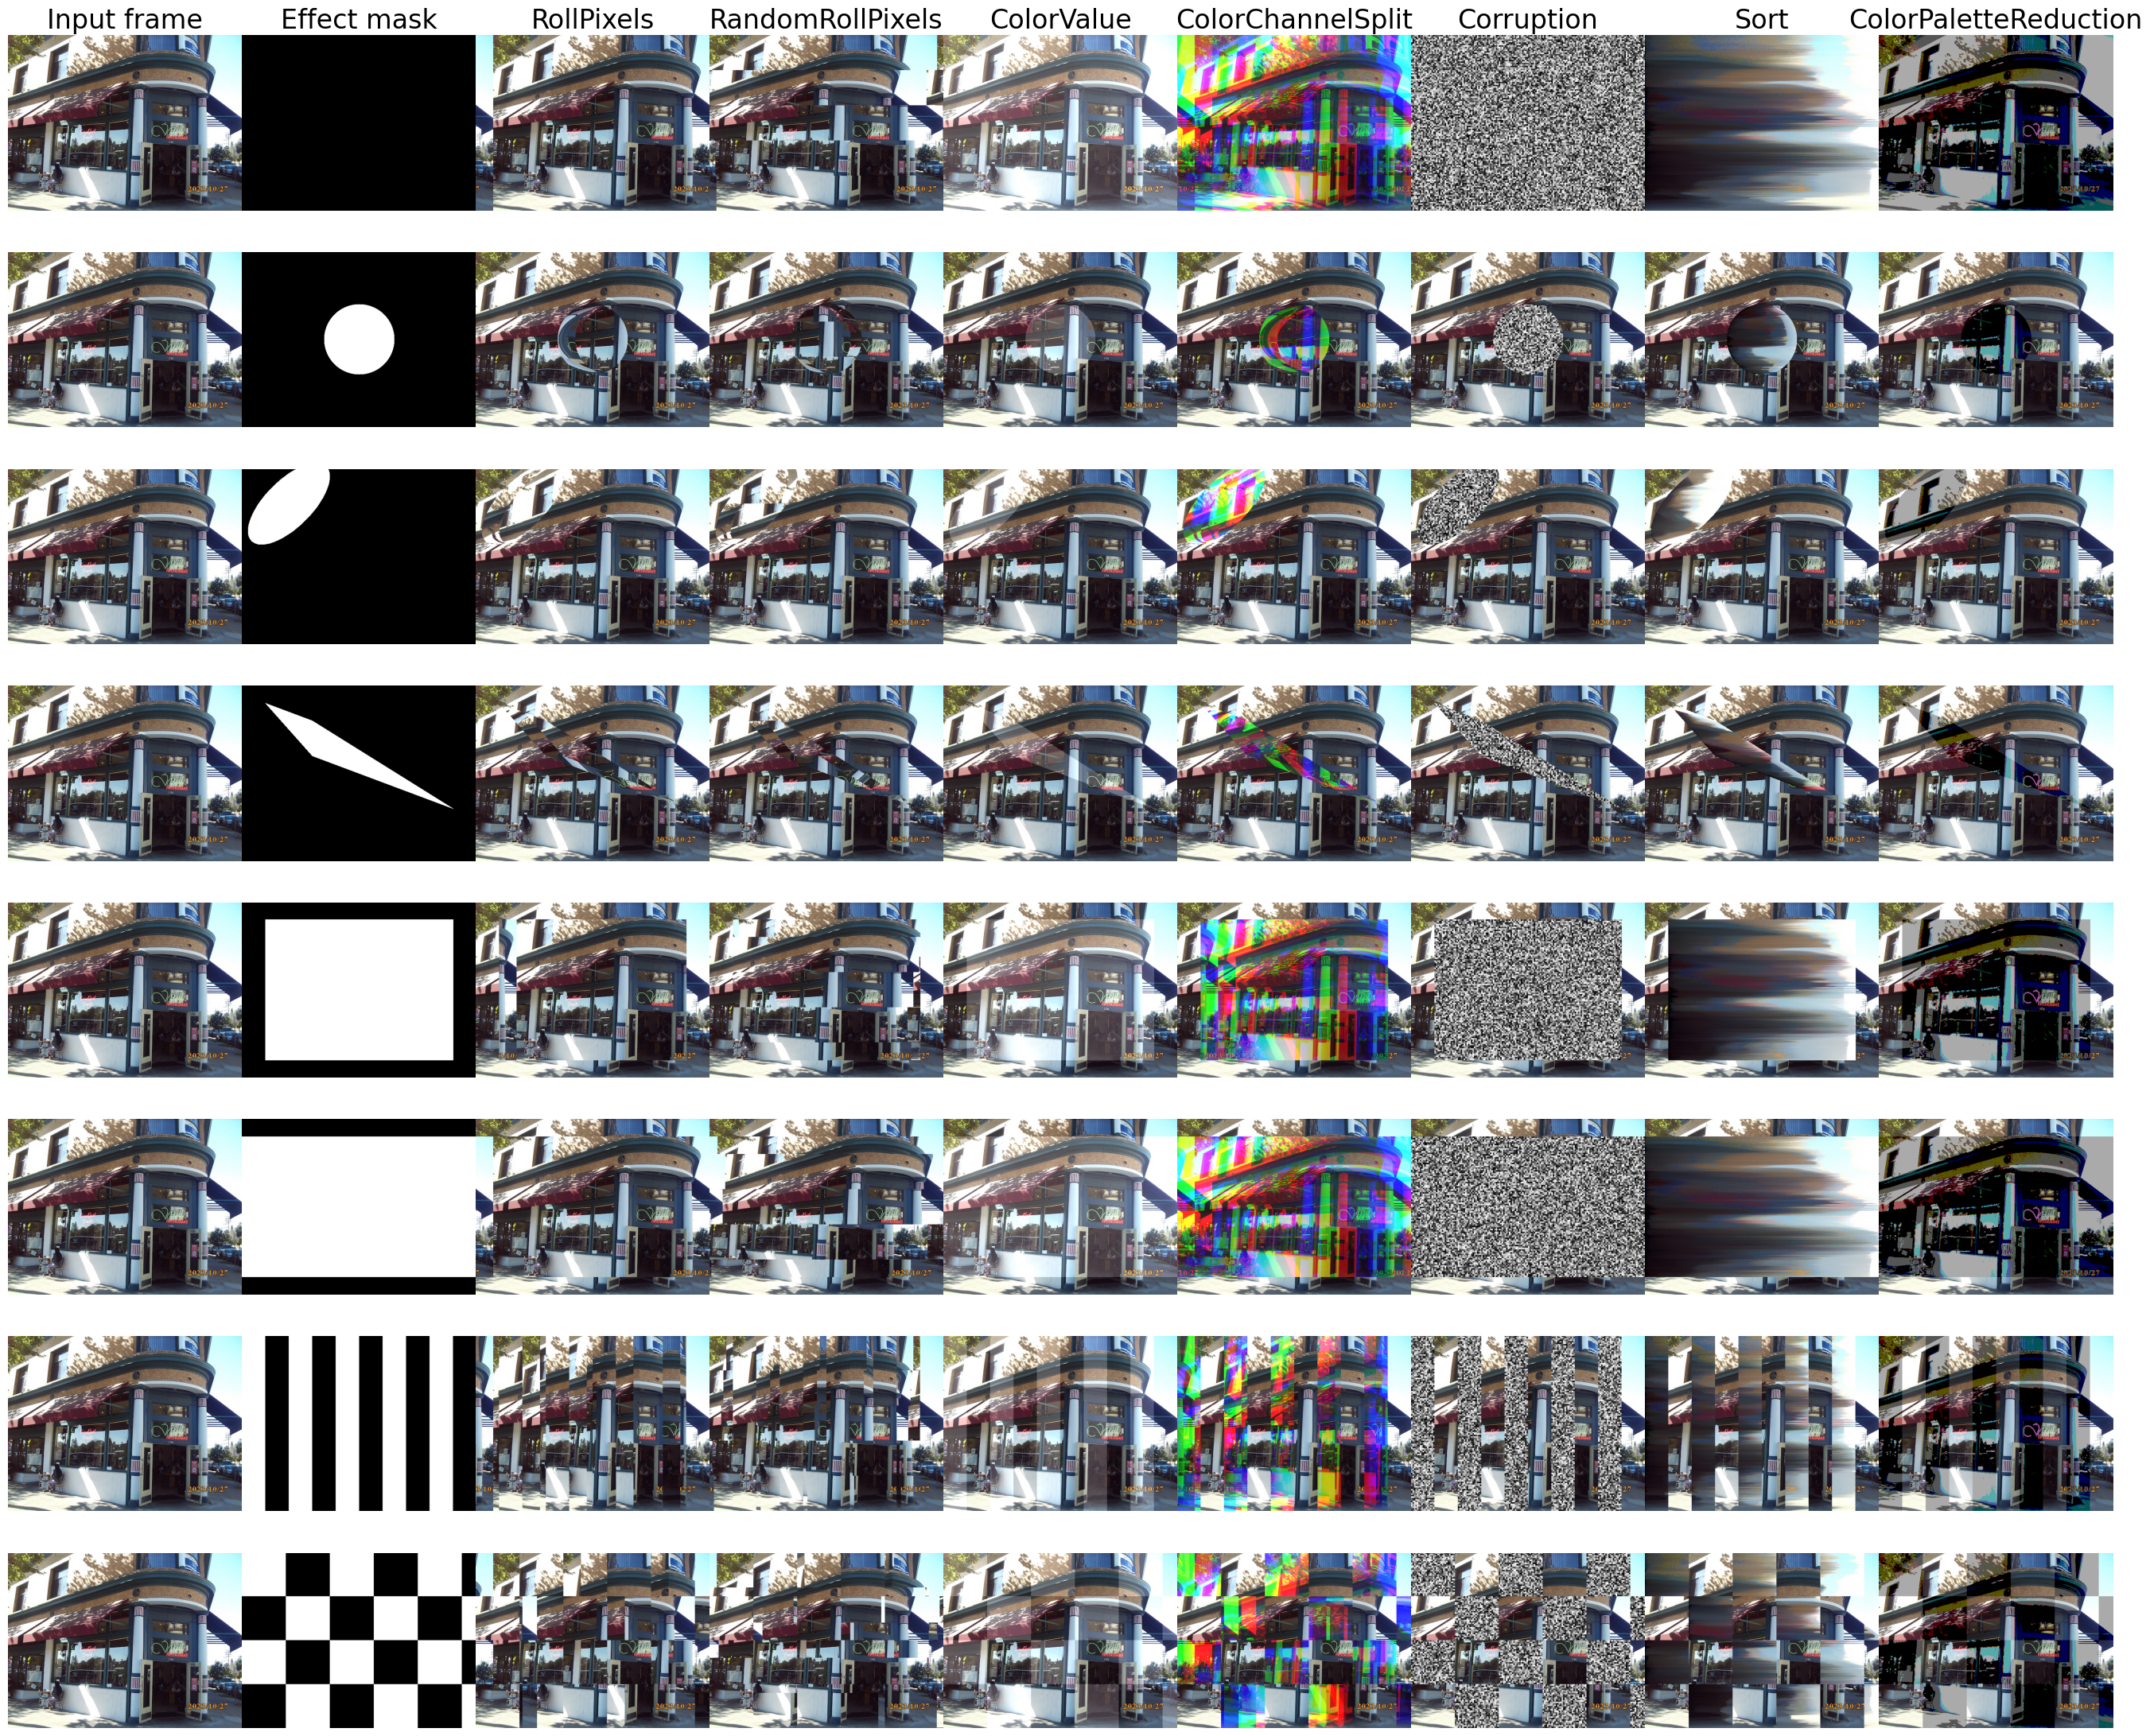

In [12]:


fig, ax = plt.subplots(len(masks), len(effects) + 2, figsize=(27, 22))
fig.subplots_adjust(
    left=0.01, right=0.99, top=0.99, bottom=0.01, hspace=0.1, wspace=0.0
)
for mask_num, (mask, ax) in enumerate(zip(masks, ax)):

    for axis in ax.flatten():
        axis.set_axis_off()
    frame = cv2.imread("test_input_1.jpg")
    masker = Masker(frame)
    mask(masker)
    ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Input frame", fontsize=24) if mask_num == 0 else ...
    ax[1].imshow(masker.mask, cmap="gray")
    ax[1].set_title("Effect mask", fontsize=24) if mask_num == 0 else ...
    for i, effect in enumerate(effects):
        effect_instance = effect(frame, mask=masker.mask)
        effect_out = effect_instance.apply()
        ax[i + 2].imshow(cv2.cvtColor(effect_out, cv2.COLOR_BGR2RGB))
        (
            ax[i + 2].set_title(effect.__name__.replace("Effect", ""), fontsize=24)
            if mask_num == 0
            else ...
        )
fig.set_alpha = 0

(2736, 3648)


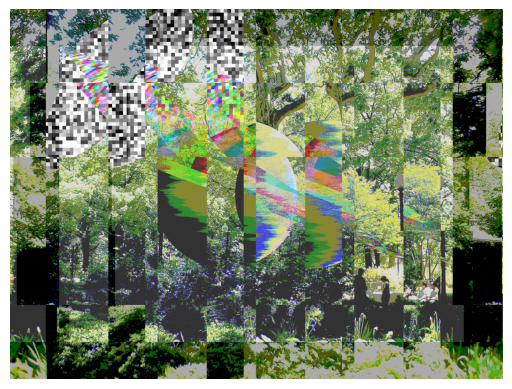

In [14]:

frame = cv2.imread("test_input_2.jpg")
for mask, effect in zip(masks, effects[::-1]):
    masker = Masker(frame)
    mask(masker)
    effect_instance = effect(frame, mask=masker.mask)
    frame = effect_instance.apply()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig("test_output_2.jpg", bbox_inches="tight", pad_inches=0)

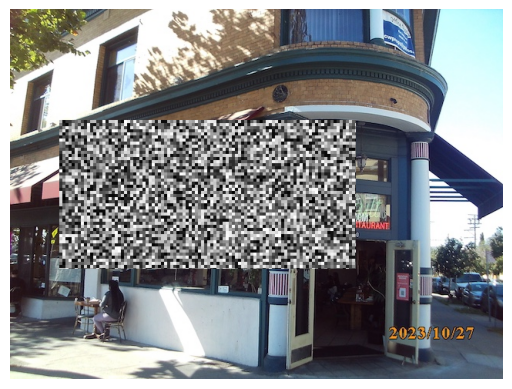

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from atypic import effects
from atypic import mask

frame = cv2.imread("test_input_1.jpg") #load image frame
masker = mask.Masker(frame) #create blank mask
masker.create_rectangle_mask((0.1,0.3),(0.7,0.7))
corruption_effect = effects.CorruptionEffect(frame, mask=masker.mask)
edited_frame = corruption_effect.apply()
plt.axis("off")  # Hide axes
plt.imshow(cv2.cvtColor(edited_frame, cv2.COLOR_BGR2RGB))
plt.savefig("basic_usage.jpg", bbox_inches="tight", pad_inches=0)

In [17]:
from atypic.effects import CorruptionEffect